# Mundo Cuadrícula

1. Comparar las ecuaciones de Bellman
2. Analizar comportamiento del agente: el agente debe determinar los valores de filas y columnas e iterar sobre todas las acciones

- Ecuación del valor esperado de Bellman

    $v_{\pi}(s)=\sum_{a\in A}\pi(a|s)\left[ R_s^a+\gamma \sum_{s' \in S}P_{ss'}^av_{\pi}(s')  \right]$

- Ecuación de solución cerrada de esperanza de Bellman

    $v_{\pi}(s)= (\gamma \sum\pi\sum P-I)^{-1}(-\sum\pi R)$
    
    $A = (\gamma \sum\pi\sum P-I)^{-1}$

    $b = -\sum\pi R$

- Ecuación de Valor óptimo de Bellman

    $v_{*}(s)= \max \left[ R_s^a+\gamma\sum_{s' \in S}P_{ss'}v_*(s')\right]$

* Condiciones:
- Probabilidad uniforme i.e. que todas las acciones tienen igual probabilidad
- Las acciones son cuatro: arriba, abajo, der, izq. $p(a) = 0.25$
- El entorno es *Determinístico*: la probabilidad de que me lance estocásticamente a otra cuadrícula es 0. Si va a arriba va a arriba.

Al ser un entorno determinista la probabilidad de pasar de un estado en el que voy hacia arriba y sea a izq, derecha, o abajo es 0

- $p(\uparrow|\uparrow) = 1$
- $p(\downarrow|\uparrow) = 0$
- $p(\leftarrow|\uparrow) = 0$
- $p(\rightarrow|\uparrow) =0$

Como consecuencia de ser un entorno determinista se tiene que $P_{ss'}^a=1$ porque p(siguiente estado | tomo una accion) es determinista i.e. $p(s_{t+1}|s_t,a)$


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table


## Entorno

Los estados especiales A y B generan un salto a sus respectivos A' y B' con una recompensa de +10 y +5 respectivamente

In [3]:
# Tablero y agenes
DIM_MUNDO = 5 # TAMA;O DE LA CUADRICULA O MUNDO
POS_A = [0,1]
POS_B = [0,3]
POS_A_PRIMA = [4,1]
POS_B_PRIMA = [2,3]

# ACCIONES

ACCIONES = [np.array([0, -1]), 
            np.array([-1, 0]), 
            np.array([0, 1]), 
            np.array([1, 0])]


# ACCIONES = np.array([[0,-1],
#                      [-1, 0],
#                      [0, 1],
#                      [1, 0]])
GRAFICO_ACCIONES = ['←', '↑', '→', '↓']

## Configurar
- factor de descuento
- politica uniforme

In [4]:
gamma = .9
PROB_ACCION = 0.25 # uniforme

## Dar Pasos

se codifica una funcion que devuelve la posicion en la cuadricula y la recompensa. Recordar que si me muevo dentro de la cuadricula la recompensa es siempre 0 a menenos que este en A o B  si me salgo de la cuadricula es -1

In [5]:
def dar_paso(estado, accion):
    if estado == POS_A:
        return POS_A_PRIMA, 10
    if estado == POS_B:
        return POS_B_PRIMA, 5
    siguiente_estado = (np.array(estado)+accion).tolist()
    x, y = siguiente_estado
    if x < 0 or x>=DIM_MUNDO or y<0 or y>=DIM_MUNDO:
        recompensa = -1.0
        siguiente_estado = estado
    else:
        recompensa = 0
    return siguiente_estado, recompensa
    

## Dibujar Cuadrícula

devuelve la cuadricula con valores numericos

crear una tabla vacia y escribir celda por celda el valor

imagen almacena la matriz de la fucion de valor

imagen es matriz

In [6]:
def dibujar_cuadricula(imagen):
    figura, eje = plt.subplots()
    eje.set_axis_off()
    cuadricula = Table(eje, bbox=[0,0,1,1])

    num_filas, num_columnas = imagen.shape
    largo, altura = 1.0/num_columnas, 1.0/num_filas

    # celdas i.e. valores celdas

    for (i,j), valor in np.ndenumerate(imagen):
        # estados especiales
        if [i,j] == POS_A:
            valor = str(valor)+" (A)"
        if [i,j] == POS_B:
            valor = str(valor)+" (B)"
        if [i,j] == POS_A_PRIMA:
            valor = str(valor)+" (A')"
        if [i,j] == POS_B_PRIMA:
            valor = str(valor)+" (B')"
        # resto de estados
        cuadricula.add_cell(i,j,largo,altura, text=valor, loc='center',facecolor='white')
    for i in range(len(imagen)):
        cuadricula.add_cell(i, -1, largo, altura, text=i+1, loc='right', edgecolor='none', facecolor='none')
        cuadricula.add_cell(-1, i, largo, altura/2, text=i+1, loc='center', edgecolor='none', facecolor='none')
    eje.add_table(cuadricula)


## Dibujar Política

In [7]:
def dibujar_politica(valores_optimos):
    figura, eje = plt.subplots()
    eje.set_axis_off()
    cuadricula = Table(eje, bbox=[0,0,1,1])
    num_filas, num_columnas = valores_optimos.shape
    largo, altura = 1.0/num_columnas, 1.0/num_filas
    for (i,j), valor in np.ndenumerate(valores_optimos):
        valores_siguientes = []
        for accion in ACCIONES:
            siguiente_estado, _ = dar_paso([i,j], accion)
            valores_siguientes.append(valores_optimos[siguiente_estado[0], siguiente_estado[1]]) # creo que indice 0 tiene i,j y 1 algun valor
        mejores_acciones = np.where(valores_siguientes == np.max(valores_siguientes))[0]
        valor = '' # acumula flechas mejores acciones
        for m_a in mejores_acciones:
            valor+=GRAFICO_ACCIONES[m_a]
        if [i,j] == POS_A:
            valor = str(valor)+" (A)"
        if [i,j] == POS_B:
            valor = str(valor)+" (B)"
        if [i,j] == POS_A_PRIMA:
            valor = str(valor)+" (A')"
        if [i,j] == POS_B_PRIMA:
            valor = str(valor)+" (B')"
        # resto de estados
        cuadricula.add_cell(i,j,largo,altura, text=valor, loc='center',facecolor='white')
    for i in range(len(valores_optimos)):
        cuadricula.add_cell(i, -1, largo, altura, text=i+1, loc='right', edgecolor='none', facecolor='none') # numeros alrededor
        cuadricula.add_cell(-1, i, largo, altura/2, text=i+1, loc='center', edgecolor='none', facecolor='none') # numeros alrededor
    eje.add_table(cuadricula)


## Convergencia con Eq. Esperanza de Bellman

$v_{\pi}(s)=\sum_{a\in A}\pi(a|s)\left[ R_s^a+\gamma \sum_{s' \in S}P_{ss'}^av_{\pi}(s')  \right]$

In [8]:
def valor_estado_bellman():
    valor = np.zeros((DIM_MUNDO, DIM_MUNDO)) # inicializacion
    while True:
        nuevo_valor = np.zeros_like(valor)
        for i in range(DIM_MUNDO): # coord x?
            for j in range(DIM_MUNDO): # coord y?
                for accion in ACCIONES:
                    (i_siguiente, j_siguiente), recompensa = dar_paso([i,j], accion)
                    # de cada una de las acciones se programa ec bellman
                    # Ec Bellman
                    nuevo_valor[i,j] += PROB_ACCION*(recompensa+gamma*valor[i_siguiente, j_siguiente]) # no falta una sumatoria aqui?
        
        if np.sum(np.abs(nuevo_valor-valor)) < 1e-4: # porque la condicion de paro?
            dibujar_cuadricula(np.round(nuevo_valor, decimals=2))
            plt.title("Valores de Esado", loc="left", pad=20)
            plt.show()
            dibujar_politica(nuevo_valor)
            plt.title("Política", loc="left", pad=20)
            plt.show()
            break
        valor = nuevo_valor           



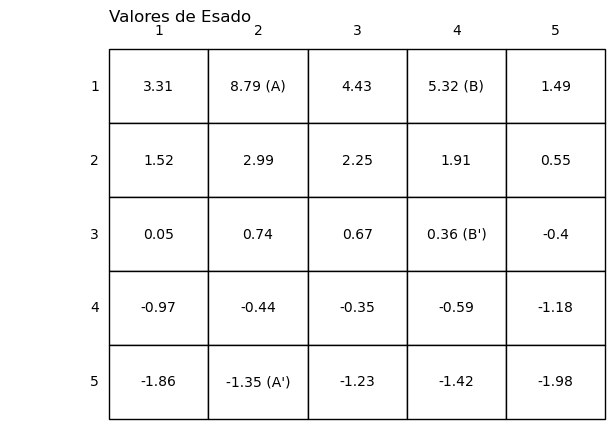

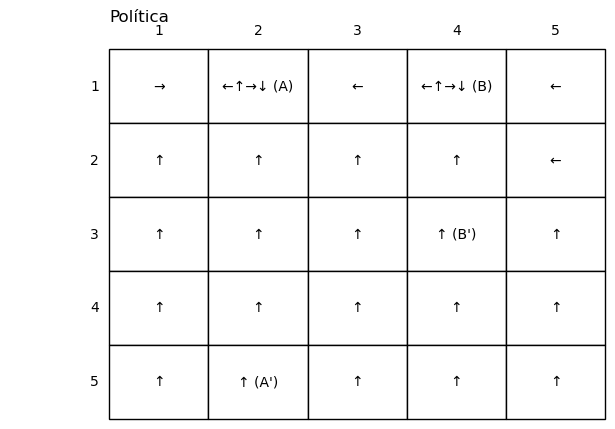

CPU times: user 358 ms, sys: 31.9 ms, total: 389 ms
Wall time: 370 ms


In [9]:
%%time
valor_estado_bellman()

## Convergencia con Iteración de Valor

se toma el maximo de todos los valores acumulados por la ec de bellman

$v_{*}(s)= \max \left[ R_s^a+\gamma\sum_{s' \in S}P_{ss'}v_*(s')\right]$

In [11]:
def valor_estado_iter():
    valor = np.zeros((DIM_MUNDO, DIM_MUNDO)) # inicializacion
    while True:
        nuevo_valor = np.zeros_like(valor)
        for i in range(DIM_MUNDO): # coord x yes
            for j in range(DIM_MUNDO): # coord y yes
                valores = [] # incia vacio
                for accion in ACCIONES:
                    (i_siguiente, j_siguiente), recompensa = dar_paso([i,j], accion)
                    valores.append(recompensa+gamma*valor[i_siguiente, j_siguiente]) 
                nuevo_valor[i,j] = np.max(valores)
        if np.sum(np.abs(nuevo_valor-valor)) < 1e-4: # porque la condicion de paro?
            dibujar_cuadricula(np.round(nuevo_valor, decimals=2))
            plt.title("Valores de Esado", loc="left", pad=20)
            plt.show()
            dibujar_politica(nuevo_valor)
            plt.title("Política", loc="left", pad=20)
            plt.show()
            break
        valor = nuevo_valor

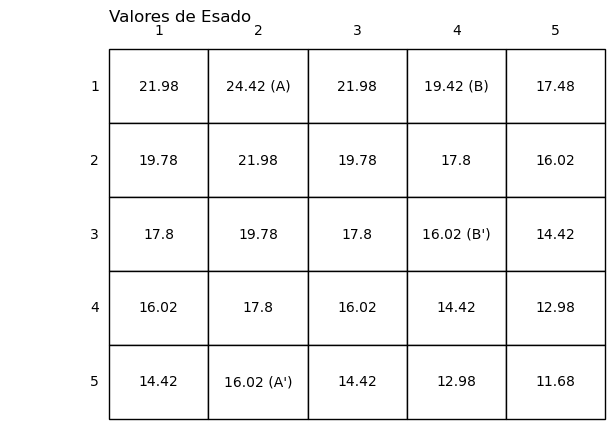

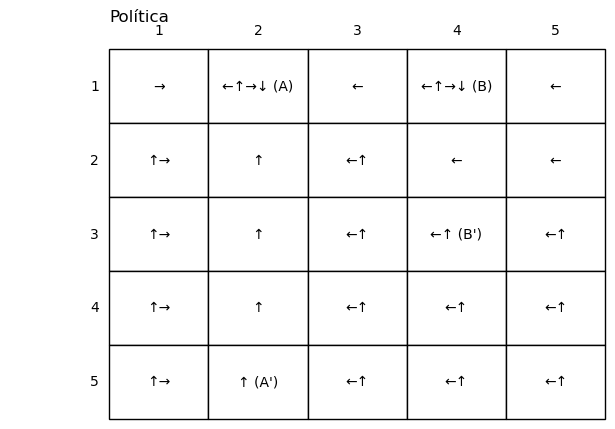

In [12]:
valor_estado_iter()

## Sistema Lineal
- b es un vector
- recompensa es un vector

$v_{\pi}(s)= (\gamma \sum\pi\sum P-I)^{-1}(-\sum\pi R)$
    
$A = (\gamma \sum\pi\sum P-I)^{-1}$

$b = -\sum\pi R$

¿ Por qué la solucion se asemeja a la solucion con ecuacion de bellman?

In [20]:
def val_estado_linear_system():
    A = -1*np.eye(DIM_MUNDO*DIM_MUNDO) # matriz Idetidad cuadrada 25 x 25
    b = np.zeros(DIM_MUNDO*DIM_MUNDO) # 1 x 25
    for i in range(DIM_MUNDO): # x
        for j in range(DIM_MUNDO): # y
            estado = [i,j]
            indice_estado = np.ravel_multi_index(estado, (DIM_MUNDO, DIM_MUNDO)) # actual
            for accion in ACCIONES:
                estado_siguiente, recompensa = dar_paso(estado, accion)
                indice_estado_siguiente = np.ravel_multi_index(estado_siguiente, (DIM_MUNDO, DIM_MUNDO)) # nuevo
                A[indice_estado, indice_estado_siguiente] += PROB_ACCION * gamma # parece que la inicializacion da cuenta de la resta
                b[indice_estado] -= PROB_ACCION*recompensa

    valor = np.linalg.solve(A,b)
    dibujar_cuadricula(np.round(valor.reshape(DIM_MUNDO, DIM_MUNDO), decimals=2))
    plt.show()
    dibujar_politica(valor.reshape(DIM_MUNDO, DIM_MUNDO))
    plt.show()




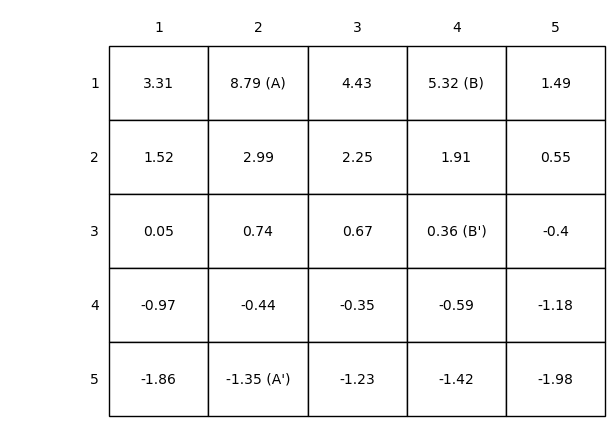

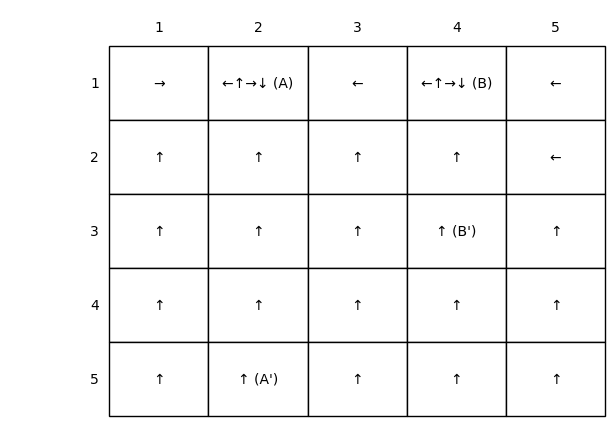

In [21]:
val_estado_linear_system()